In [9]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

<B>

Q1. 

+ We have the min and max temperatures in a city In India for each months of the year. <Br>
+ We would like to find a function to describe this and show it graphically, the dataset
given below.

Task: <Br><Br>
1.fitting it to the periodic function <Br>
2.plot the fit <Br><Br>
 Data <Br>
+ Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
+ Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

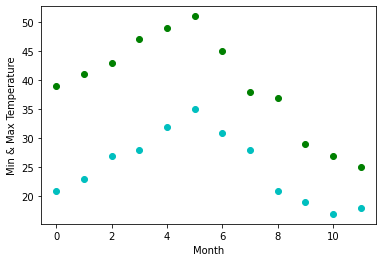

In [13]:
#min and max variables
temp_max=[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
temp_min=[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

#setting range of 12 months to plot data
months = np.arange(12)
plt.plot(months,temp_max, 'go')
plt.plot(months, temp_min, 'co')
plt.xlabel("Month")
plt.ylabel("Min & Max Temperature")
plt.show()


In [29]:
#fitting it to a periodic function

#defining periodic function
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) *1.8 *np.pi/times.max()))

res_max,cov_max = optimize.curve_fit(yearly_temps, months, temp_max,[40,20,0])
res_min,cov_min = optimize.curve_fit(yearly_temps, months, temp_min,[-40,20,0])

print(res_max)
print(res_min)

[ 39.10062829 -11.08724928   2.10332481]
[24.87112259 -7.8989966   1.60673367]


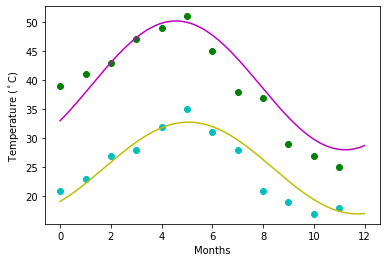

In [42]:
#plotting the fit
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_max , "go")
plt.plot(days, yearly_temps(days, *res_max),"m")
plt.plot(months, temp_min , "co")
plt.plot(days, yearly_temps(days, *res_min),"y")
plt.xlabel("Months")
plt.ylabel("Temperature ($^\circ$C)")
plt.show()


<B>
_______________________________________________________________________________________________________________________________


Q2. Matplotlib: <Br>
This assignment is for visualization using matplotlib:<Br><Br>
data to use:<Br>
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
<Br><Br>
Charts to plot:<Br> 
1. Create a pie chart presenting the male/female proportion<Br>
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [17]:
#importing data
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

df = pd.read_csv(url,skip_blank_lines=True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5, 1.0, 'Male / Female proportion')

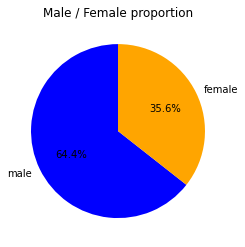

In [69]:
#pie chart presenting the male/female proportion
count=df['sex'].value_counts()
colors = ['blue', 'orange']
f, (ax1) = plt.subplots()
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90,
        autopct='%.1f%%')
ax1.set_title('Male / Female proportion')

<Figure size 432x288 with 0 Axes>

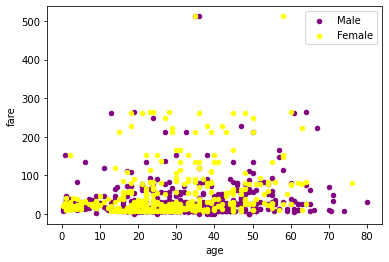

In [74]:
#Scatterplot with the Fare paid and the Age, 
#differ the plot color by gender

plt.figure()

cat1=df[df.sex=="male"].plot.scatter("age","fare",color="purple",label="Male")

cat1=df[df.sex=="female"].plot.scatter("age","fare",color="yellow",label="Female", ax=cat1)